In [1]:
from read_penguin import load_2D_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import geometry as geo
from Interpolate import *
from Search import binSearch

In [2]:
#Loading Data
xres = 384
yres = 768
filepath = "/home/afkirby/penguinPlots/2DGammaChange/"
gam10data = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.0/", xres, yres, "h50_1p1J_e0_PPM4", 100)

In [3]:
def velocity(x, y, data):
    xVals = data[1]
    yVals = data[2]
    xVel = data[5]
    yVel = data[6]
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty):
        return (0,0)
    elif(xPoints[1] == np.infty):
        return (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (len(yVals)-2, 0)
    elif(yPoints[1] == np.infty):
        yPoints = (0, len(yVals)-2)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    ysquareVals = [yVel[lowy,lowx], yVel[highy,lowx], yVel[lowy,highx], yVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vy = biInterpolate(targetCoords, ysquareVals, minCoords, maxCoords)
    
    vels = (vx, vy)
    return geo.sphericalToCartesianVelocity(targetCoords, vels, dim=2)

In [4]:
#Planetary Coordinates/Velocity
planetCoords = (1, np.pi)
planetCoordsCart = geo.sphericalToCartesian(planetCoords, dim = 2)
planetVel = (0, 1)
planetVelCart = geo.sphericalToCartesianVelocity(planetCoords, planetVel, dim = 2)

#Creating Corotating Cartesian Grid
coordX = np.ndarray(1001)
coordY = np.ndarray(1001)
for i in range(1001):
    coordX[i] = -gam10data[1][-1] + 2*gam10data[1][-1]*(i)/1000
    
for j in range(1001):
    coordY[j] = -gam10data[1][-1] + 2*gam10data[1][-1]*(j)/1000

gam10rCo = gam10data[5]
gam10thetaCo = gam10data[6]
for i in range(xres):
    for j in range(yres):
        gam10thetaCo[j,i] = gam10thetaCo[j,i] - planetVel[1]*gam10data[1][i]
gam10velCartX = np.ndarray((1001,1001))
gam10velCartY = np.ndarray((1001,1001))
gam10dataCo = [gam10data[0], gam10data[1], gam10data[2], gam10data[3], gam10data[4], gam10rCo, gam10thetaCo]
for i in range(1001):
    for j in range(1001):
        cartesian = (coordX[i], coordY[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        velocities = velocity(polar[0], polar[1], gam10dataCo)
        gam10velCartX[j,i] = velocities[0]
        gam10velCartY[j,i] = velocities[1]
        
#Focusing Around The Planet
coordXSmall = np.ndarray(1001)
coordYSmall = np.ndarray(1001)
for i in range(1001):
    coordXSmall[i] = -1.1 + 0.2*(i)/1000
    
for j in range(1001):
    coordYSmall[j] = -0.1 + 0.2*(j)/1000

gam10velCartXSmall = np.ndarray((1001,1001))
gam10velCartYSmall = np.ndarray((1001,1001))
gam10dataCo = [gam10data[0], gam10data[1], gam10data[2], gam10data[3], gam10data[4], gam10rCo, gam10thetaCo]
for i in range(1001):
    for j in range(1001):
        cartesian = (coordXSmall[i], coordYSmall[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        velocities = velocity(polar[0], polar[1], gam10dataCo)
        gam10velCartXSmall[j,i] = velocities[0]
        gam10velCartYSmall[j,i] = velocities[1]
for i in range(1001):
    coordX[i] = coordX[i] - planetCoordsCart[0]
    coordXSmall[i] = coordXSmall[i] - planetCoordsCart[0]
    coordY[i] = coordY[i] - planetCoordsCart[1]
    coordYSmall[i] = coordYSmall[i] - planetCoordsCart[1]

/home/afkirby/PEnGUIn/read/geometry.py:28: RuntimeWarning: invalid value encountered in double_scalars
  phi = np.arccos(z/r)


In [5]:
def isoVel(x, y):
    x1 = y[0] #X Position
    x2 = y[1] #Y Position
    
    xVals = coordXSmall
    yVals = coordYSmall
    xPoints = binSearch(xVals, 0, len(xVals), x1)
    yPoints = binSearch(yVals, 0, len(yVals), x2)
    if(xPoints[0] == -np.infty):
        xPoints = (0,0)
    elif(xPoints[1] == np.infty):
        xPoints = (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (0,0)
    if(yPoints[1] == np.infty):
        yPoints = (0,0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xVel = gam10velCartXSmall
    yVel = gam10velCartYSmall
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x1,x2)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    ysquareVals = [yVel[lowy,lowx], yVel[highy,lowx], yVel[lowy,highx], yVel[highy,highx]]
    targetCoords = (x1,x2)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vy = biInterpolate(targetCoords, ysquareVals, minCoords, maxCoords)
    
    return np.array([vx, vy])
    


def RK45(y0, xi, xf, maxstep, maxerror, fun):
    h = maxstep
    x = xi
    while(True):
        if(h > xf-x):
            h = xf - x
        #Calculating k's
        k1 = h*fun(x, y0)
        k2 = h*fun(x+h/4, y0+k1/4)
        k3 = h*fun(x+3*h/8, y0+3*k1/32+9*k2/32)
        k4 = h*fun(x+12*h/13, y0+1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*fun(x+h, y0 + 439.0*k1/216.0 - 8.0*k2 + 3680*k3/513.0 - 845.0*k4/4104.0)
        k6 = h*fun(x+h/2, y0 - 8.0*k1/27.0 + 2.0*k2 - 3544.0*k3/2565.0 + 1859.0*k4/4104.0 - 11.0*k5/40.0)

        #Calculating 5th order approximation and estimated error
        fourth = (25.0*k1/216.0 + 1408*k3/2565.0 + 2197.0*k4/4104.0 - k5/5.0)
        fifth = (16.0*k1/135.0 + 6656.0*k3/12825.0 + 28561.0*k4/56430.0 - 9.0*k5/50.0 + 2.0*k6/55.0)

        error = (fourth - fifth)/h
        for l in range(len(error)):
            if(error[l] < 0):
                error[l] = -error[l]

        #Finding relative error and adapting step size
        estError = 0
        for i in range(len(error)):
            estError += pow(error[i], 2)
        estError = estError**(1/2)

        if(estError > maxerror):
            h = h*0.9*pow(maxerror/estError, 0.2)
            continue

        if(estError <= maxerror):
            hnew = 1.1*h
            if(h > maxstep):
                hnew = maxstep
            break
    return [fifth, error, h, hnew]


In [6]:
def flowLine(xi, yi, coordX, coordY, maxerror, fun):
    vals = []
    xs = []
    y0 = np.array([xi, yi])
    xf = coordX[-1]
    yf = coordY[-1]

    h = abs(xf-xi)/100
    vals.append(yi)
    xs.append(xi)
    n = 0
    while(abs(y0[0]) < xf and abs(y0[1]) < yf and n < 10000):
        correction = RK45(y0, y0[0], xf, h, maxerror, fun)
        y0 = y0 + correction[0]
        vals.append(y0[1])
        xs.append(y0[0])
        h = correction[3]
        n = n+1

    y0 = np.array([xi, yi])
    h = abs(xf-xi)/100
    n = 0
    while(abs(y0[0]) < xf and abs(y0[1]) < yf and n < 10000):
        correction = RK45(y0, y0[0], xf, h, maxerror, fun)
        y0 = y0 - correction[0]
        vals.insert(0, y0[1])
        xs.insert(0, y0[0])
        h = correction[3]
        n = n+1
    return (xs, vals)

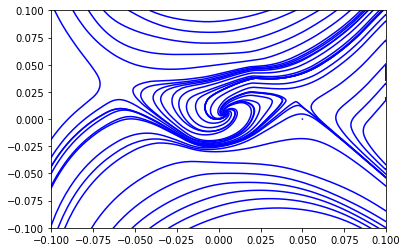

In [7]:
for i in range(10):
    flow = flowLine(0, coordYSmall[-1]*i/10, coordXSmall, coordYSmall, 1e-6, isoVel)
    plt.plot(flow[0], flow[1], color = 'b')
    flow = flowLine(0, -coordYSmall[-1]*i/10, coordXSmall, coordYSmall, 1e-6, isoVel)
    plt.plot(flow[0], flow[1], color = 'b')
    flow = flowLine(coordXSmall[-1]*i/10, 0, coordXSmall, coordYSmall, 1e-6, isoVel)
    plt.plot(flow[0], flow[1], color = 'b')
    flow = flowLine(-coordXSmall[-1]*i/10, 0, coordXSmall, coordYSmall, 1e-6, isoVel)
    plt.plot(flow[0], flow[1], color = 'b')
plt.ylim(coordYSmall[0], coordYSmall[-1])
plt.xlim(coordXSmall[0], coordXSmall[-1])
plt.show()

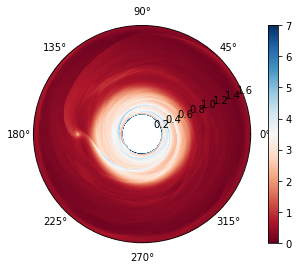

In [8]:
gam14data = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.4/", xres, yres, "h50_1p1J_e0_PPM4", 100)

fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'})
ax.grid(False)
plt.pcolormesh(gam14data[2], gam14data[1], np.transpose(gam14data[3]), cmap = "RdBu", vmin = 0, vmax = 7)
plt.colorbar()
plt.show()

#Creating Corotating Cartesian Grid
coordXAdi = np.ndarray(1001)
coordYAdi = np.ndarray(1001)
for i in range(1001):
    coordXAdi[i] = -gam14data[1][-1] + 2*gam14data[1][-1]*(i)/1000
    
for j in range(1001):
    coordYAdi[j] = -gam14data[1][-1] + 2*gam14data[1][-1]*(j)/1000

gam14rCo = gam14data[5]
gam14thetaCo = gam14data[6]
for i in range(xres):
    for j in range(yres):
        gam14thetaCo[j,i] = gam14thetaCo[j,i] - planetVel[1]*gam14data[1][i]
gam14velCartX = np.ndarray((1001,1001))
gam14velCartY = np.ndarray((1001,1001))
gam14dataCo = [gam14data[0], gam14data[1], gam14data[2], gam14data[3], gam14data[4], gam14rCo, gam14thetaCo]
for i in range(1001):
    for j in range(1001):
        cartesian = (coordXAdi[i], coordYAdi[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        velocities = velocity(polar[0], polar[1], gam14dataCo)
        gam14velCartX[j,i] = velocities[0]
        gam14velCartY[j,i] = velocities[1]
        
#Focusing Around The Planet
coordXSmallAdi = np.ndarray(1001)
coordYSmallAdi = np.ndarray(1001)
for i in range(1001):
    coordXSmallAdi[i] = -1.1 + 0.2*(i)/1000
    
for j in range(1001):
    coordYSmallAdi[j] = -0.1 + 0.2*(j)/1000

gam14velCartXSmall = np.ndarray((1001,1001))
gam14velCartYSmall = np.ndarray((1001,1001))
gam14dataCo = [gam14data[0], gam14data[1], gam14data[2], gam14data[3], gam14data[4], gam14rCo, gam14thetaCo]
for i in range(1001):
    for j in range(1001):
        cartesian = (coordXSmall[i], coordYSmall[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        velocities = velocity(polar[0], polar[1], gam14dataCo)
        gam14velCartXSmall[j,i] = velocities[0]
        gam14velCartYSmall[j,i] = velocities[1]
for i in range(1001):
    coordXAdi[i] = coordXAdi[i] - planetCoordsCart[0]
    coordXSmallAdi[i] = coordXSmallAdi[i] - planetCoordsCart[0]
    coordYAdi[i] = coordYAdi[i] - planetCoordsCart[1]
    coordYSmallAdi[i] = coordYSmallAdi[i] - planetCoordsCart[1]

In [9]:
def adiVel(x, y):
    x1 = y[0] #X Position
    x2 = y[1] #Y Position
    
    xVals = coordXSmallAdi
    yVals = coordYSmallAdi
    xPoints = binSearch(xVals, 0, len(xVals), x1)
    yPoints = binSearch(yVals, 0, len(yVals), x2)
    if(xPoints[0] == -np.infty):
        xPoints = (0,0)
    elif(xPoints[1] == np.infty):
        xPoints = (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (0,0)
    if(yPoints[1] == np.infty):
        yPoints = (0,0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xVel = gam14velCartXSmall
    yVel = gam14velCartYSmall
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x1,x2)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    ysquareVals = [yVel[lowy,lowx], yVel[highy,lowx], yVel[lowy,highx], yVel[highy,highx]]
    targetCoords = (x1,x2)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vy = biInterpolate(targetCoords, ysquareVals, minCoords, maxCoords)
    
    return np.array([vx, vy])

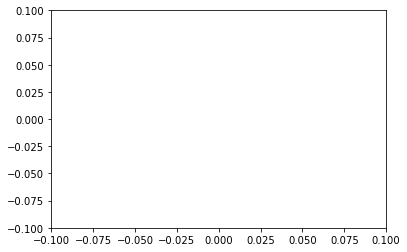

In [12]:
for i in range(10):
    flow = flowLine(0, coordYSmallAdi[-1]*i/10, coordXSmallAdi, coordYSmallAdi, 1e-6, adiVel)
    plt.plot(flow[0], flow[1], color = 'b')
    flow = flowLine(0, -coordYSmallAdi[-1]*i/10, coordXSmallAdi, coordYSmallAdi, 1e-6, adiVel)
    plt.plot(flow[0], flow[1], color = 'b')
    flow = flowLine(coordXSmallAdi[-1]*i/10, 0, coordXSmallAdi, coordYSmallAdi, 1e-6, adiVel)
    plt.plot(flow[0], flow[1], color = 'b')
    flow = flowLine(-coordXSmallAdi[-1]*i/10, 0, coordXSmallAdi, coordYSmallAdi, 1e-6, adiVel)
    plt.plot(flow[0], flow[1], color = 'b')
plt.ylim(coordYSmallAdi[0], coordYSmallAdi[-1])
plt.xlim(coordXSmallAdi[0], coordXSmallAdi[-1])
plt.show()